In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Insights

- KP281 is most sold ~44%. KP781 is least sold ~22%
- Income has the highest number of outliers ~19 with a difference of ~3k between median and mean
- 60% of our sample size were Partnered
- Most of the individuals are from 20-30 Age Bracket (As seen from univariate chart)
- More than half(53%) people reported to have 3 fitness level
- Partnered people tend to buy more treadmills than single across all 3 products ~ 60:40 split.
- KP781 is predominantly bought by : 
    - male (~82%)
    - high fitness individuals (72% purchasers reported 5 fitness level) 
    - usage is 4 days a week (~45%)
    - High Income Individuals 
    - Highly Educated Individuals 
    - Long Distance Runners 
- A strong correlation between education and income is also seen (0.63)

# Recommendatations

- The treadmill products should be clubbed in 2 segements : KP281, KP481 as one segement(Standard) as KP781 as another(Premium), as long as sales and marketing is concerned.
- To increase the sales of the premimum product, the marketing/sales team should focus on male individuals who are highly educated, have high income, are into fitness and plan to run long and also use treadmill more often than not in week.
- To increase the sales of the standard products, the marketing/sales team should focus on individuals who do are have average levels of education, income and those who are in a starting point in their fitness career and not necessarily plan to use the treadmill very often in a week.

# Basic EDA

In [2]:
df = pd.read_excel('treadmill.xlsx')

In [3]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum().any()

False

## Conversion to Object type

In [9]:
df['Usage'] = df['Usage'].astype('O')
df['Fitness'] = df['Fitness'].astype('O')

In [12]:
df.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


In [13]:
df.describe(include='O')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


In [73]:
for c in df.select_dtypes('O').columns:
    print(f'------------\nDistribution of : {c} ')
    display(df[c].value_counts(1).sort_index()* 100)

------------
Distribution of : Product 


KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

------------
Distribution of : Gender 


Female    42.222222
Male      57.777778
Name: Gender, dtype: float64

------------
Distribution of : MaritalStatus 


Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

------------
Distribution of : Usage 


2    18.333333
3    38.333333
4    28.888889
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

------------
Distribution of : Fitness 


1     1.111111
2    14.444444
3    53.888889
4    13.333333
5    17.222222
Name: Fitness, dtype: float64

In [24]:
print('Distribution of treadmill in %')
round(df['Product'].value_counts(1) * 100)

Distribution of treadmill in %


KP281    44.0
KP481    33.0
KP781    22.0
Name: Product, dtype: float64

----

# Detecting outliers

In [25]:
def detect_outliers(x):
    print(f"Column : {x.name.upper()}")
    print(f"Difference between mean and median is : {round(x.mean() - x.median(),1)}")
    IQR = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    upper_whisker = np.quantile(x, 0.75) + 1.5*IQR
    lower_whisker = np.quantile(x, 0.25) - 1.5*IQR
    outliers = ((x>upper_whisker) | (x<lower_whisker)).sum()
    print(f'Total number of outliers : {outliers}')
    sns.boxplot(x=x)
    plt.show()
    return

Column : AGE
Difference between mean and median is : 2.8
Total number of outliers : 5


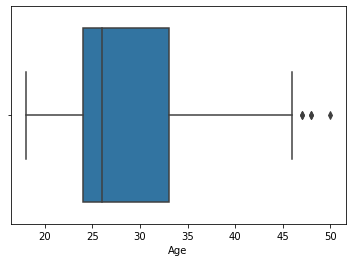


-----------------------------------------------------

Column : EDUCATION
Difference between mean and median is : -0.4
Total number of outliers : 4


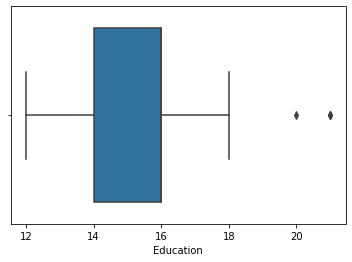


-----------------------------------------------------

Column : INCOME
Difference between mean and median is : 3123.1
Total number of outliers : 19


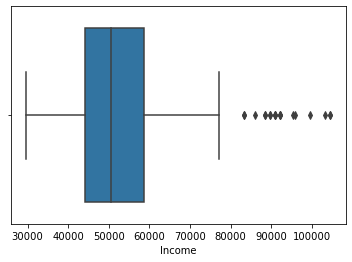


-----------------------------------------------------

Column : MILES
Difference between mean and median is : 9.2
Total number of outliers : 13


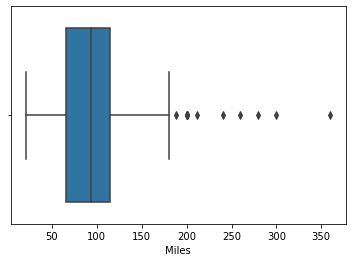


-----------------------------------------------------



In [26]:
for c in ['Age', 'Education', 'Income', 'Miles']:
    detect_outliers(df[c])
    print('\n-----------------------------------------------------\n')

# Univariate and Bivariate Plots

## Univariate : Categorical

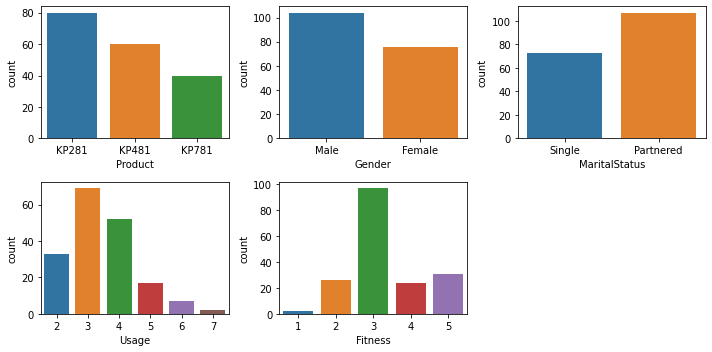

In [57]:
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['figure.autolayout'] = True
for e, c in enumerate(df.select_dtypes('O').columns):
    ax = plt.subplot(2,3,e+1)
    sns.countplot(x=df[c], ax=ax)

## Bivariate : Categorical

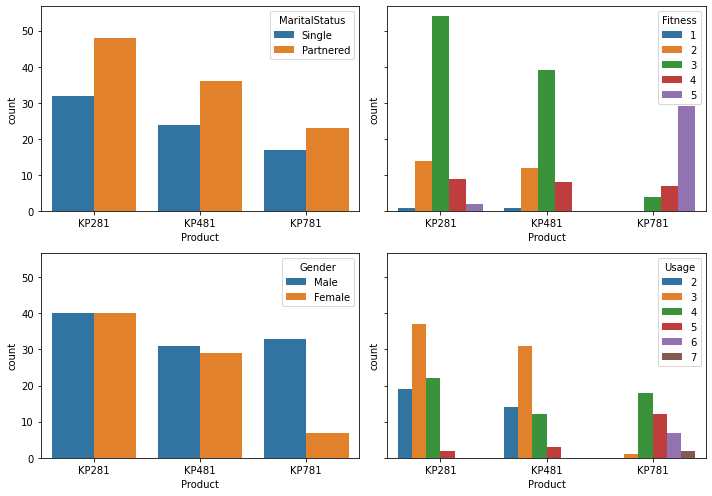

In [58]:
fig,ax = plt.subplots(2,2,figsize=(10,7),sharey=True)
sns.countplot(x='Product',hue='MaritalStatus',data=df, ax=ax[0][0])
sns.countplot(x='Product',hue='Gender',data=df, ax=ax[1][0])
sns.countplot(x='Product',hue='Usage',data=df, ax=ax[1][1])
sns.countplot(x='Product',hue='Fitness',data=df, ax=ax[0][1])
plt.tight_layout()

In [59]:
for c in df.select_dtypes('O').columns[1:]:
    print(f'----------\nCrosstab for : {c}')
    display(round(pd.crosstab(index=df['Product'],columns=df[c],normalize='index') * 100))

----------
Crosstab for : Gender


Gender,Female,Male
Product,,
KP281,50.0,50.0
KP481,48.0,52.0
KP781,18.0,82.0


----------
Crosstab for : MaritalStatus


MaritalStatus,Partnered,Single
Product,,
KP281,60.0,40.0
KP481,60.0,40.0
KP781,57.0,42.0


----------
Crosstab for : Usage


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,24.0,46.0,28.0,2.0,0.0,0.0
KP481,23.0,52.0,20.0,5.0,0.0,0.0
KP781,0.0,2.0,45.0,30.0,18.0,5.0


----------
Crosstab for : Fitness


Fitness,1,2,3,4,5
Product,,,,,
KP281,1.0,18.0,68.0,11.0,2.0
KP481,2.0,20.0,65.0,13.0,0.0
KP781,0.0,0.0,10.0,18.0,72.0


## Univariate : Numerical 

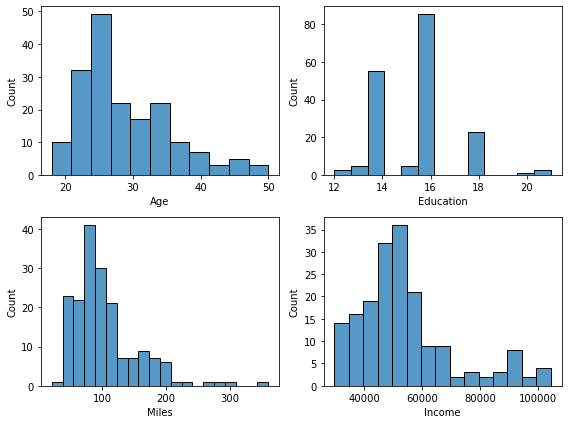

In [62]:
fig,ax = plt.subplots(2,2,figsize=(8,6))
sns.histplot(df['Age'], ax=ax[0][0])
sns.histplot(df['Education'], ax=ax[0][1])
sns.histplot(df['Income'], ax=ax[1][1])
sns.histplot(df['Miles'], ax=ax[1][0])
plt.tight_layout()

## Bivariate : Numercial

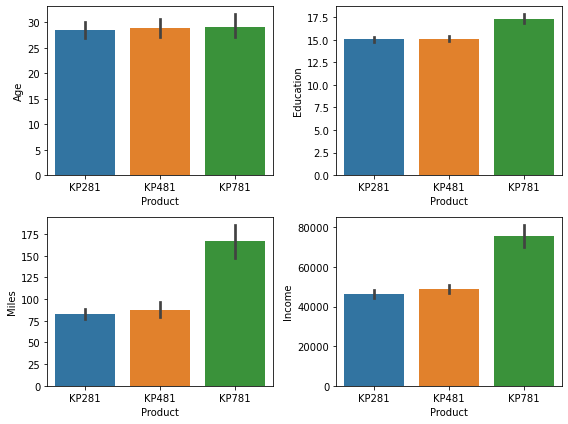

In [64]:
fig,ax = plt.subplots(2,2,figsize=(8,6))
sns.barplot(x='Product',y='Age',data=df, ax=ax[0][0])
sns.barplot(x='Product',y='Education',data=df, ax=ax[0][1])
sns.barplot(x='Product',y='Income',data=df, ax=ax[1][1])
sns.barplot(x='Product',y='Miles',data=df, ax=ax[1][0])
plt.tight_layout()

# Correlation Matrix

<AxesSubplot:>

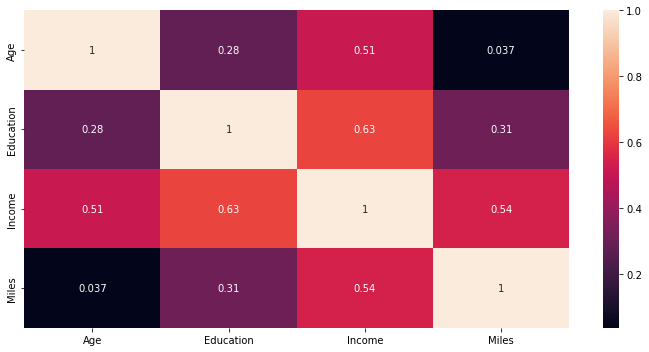

In [67]:
sns.heatmap(df.corr(), annot=True)

- Income and Education have high correlation

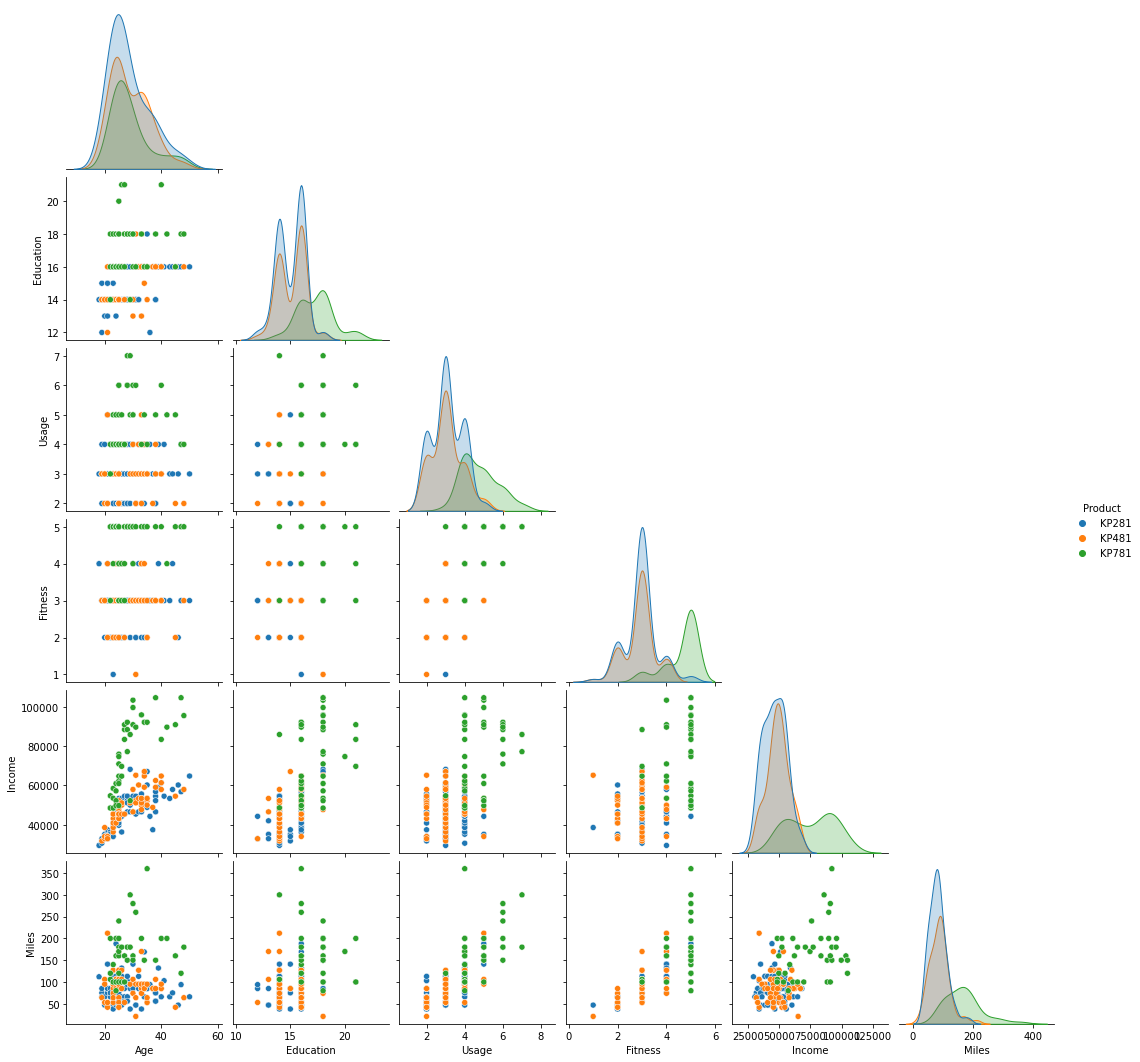

In [69]:
sns.pairplot(df, hue='Product', corner=True)

# Probablities

P(KP781|Male) = P(KP781 & Male)/P(Male)

In [70]:
P_Male = (df['Gender']=='Male').mean()
P_KP781_and_Male = ((df['Product']=='KP781') & (df['Gender']=='Male')).mean()

In [71]:
#Probability of a male customer buying KP781 treadmill
P_KP781_and_Male/P_Male

0.3173076923076923